In [1]:
import numpy as np
import scipy as sc
import os, re
import matplotlib.pyplot as plt
from prettyprint import pp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from datetime import datetime as dt
from ipy_table import *
from string import punctuation, digits

In [2]:
data_path = '/Users/alexandre/Projects/TextClassificationBayes/tok_vnexpress/'
stopwords_path = '/Users/alexandre/Projects/TextClassificationBayes/vietnamese-stopwords-dash.txt'


#Classes are the folder names
class_names = os.listdir(data_path)
folders =  [data_path + folder + '/' for folder in os.listdir(data_path) if folder != ".DS_Store"]

if '.DS_Store' in class_names: del class_names[0]


#list the files of each class
files = {}

for folder, name in zip(folders, class_names):
    files[name] = [folder + f for f in os.listdir(folder)]
    
    
train_test_ratio = 0.7

In [3]:
def train_test_split(ratio, classes, files):
    """
    this method will split the input list of files to train and test sets.
    *Note: currently this method uses the simplest way an array can be split in two parts.
    Parameters
    ----------
    ratio: float
           ratio of total documents in each class assigned to the training set
    classes: list
             list of label classes
    files: dictionary
           a dictionary with list of files for each class
    
    Returns
    -------
    train_dic: dictionary
                a dictionary with lists of documents in the training set for each class
    test_dict: dictionary
                a dictionary with lists of documents in the testing set for each class
    """
    train_dict = {}
    test_dict = {}
    for cl in classes:
        train_cnt = int(ratio * len(files[cl]))
        train_dict[cl] = files[cl][:train_cnt]
        test_dict[cl] = files[cl][train_cnt:]
    return train_dict, test_dict


train_path, test_path = train_test_split(train_test_ratio, class_names, files)
#train_path, test_path, class_train, class_test = train_test_split(files, class_names, test_size=0.3, random_state=42)
stop_word = []

def loadStopWord(path):

    from string import punctuation, digits
    stop_word = []
    try:
        f = open(path)
        lines = [line.rstrip('\n') for line in open(path)]
        lines = [line.replace('_', '') for line in lines]
            
    finally:
        f.close()
    return lines

stop_word = loadStopWord(stopwords_path)


def cleanupText(path):
    """
    this method will read in a text file and try to cleanup its text.
    Parameters
    ----------
    path: path to the document file
    
    Returns
    -------
    text_cleaned: cleaned up raw text in the input file
    """
    
    text_cleaned = ''
    try:
        f = open(path)
        raw = f.read().lower()
        text =  raw
        text_cleaned = text.translate(None, punctuation + digits)
        # print "\n Word count before:" + str(len(text_translated.split())) + "\n"
        # for stop in stop_word:
        #   text_translated = text_translated.replace(stop,'')
        # print "\n Word count after:" + str(len(text_translated.split())) + "\n"
        text_cleaned = ' '.join([word for word in text_cleaned.split(' ') if (word and len(word) > 1)])
        
    finally:
        f.close()
    return text_cleaned

In [4]:
train_arr = []
test_arr = []
train_lbl = []
test_lbl = []


for cl in class_names:
    for path in train_path[cl]:
        train_arr.append(cleanupText(path))
        train_lbl.append(cl)
    for path in test_path[cl]:
        test_arr.append(cleanupText(path))
        test_lbl.append(cl)
        
print len(train_arr)
print len(test_arr)

33236
14251


In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(train_arr)
train_mat = vectorizer.transform(train_arr)
print train_mat.shape
#print train_mat
test_mat = vectorizer.transform(test_arr)
print test_mat.shape

tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
print train_tfmat.shape
#print train_tfmat
test_tfmat = tfidf.transform(test_mat)
print test_tfmat.shape

(33236, 133112)
(14251, 133112)
(33236, 133112)
(14251, 133112)


In [8]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    """
    this method will first train the classifier on the training data
    and will then test the trained classifier on test data.
    Finally it will report some metrics on the classifier performance.
    
    Parameters
    ----------
    x_train: np.ndarray
             train data matrix
    y_train: list
             train data label
    x_test: np.ndarray
            test data matrix
    y_test: list
            test data label
    clf: sklearn classifier object implementing fit() and predict() methods
    
    Returns
    -------
    metrics: list
             [training time, testing time, recall and precision for every class, macro-averaged F1 score]
    """
   
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print 'training time: ', (end - start)
    
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print 'testing time: ', (end - start)
   
    print 'classification report: '

    pp(classification_report(y_test, yhat))
    
    print 'f1 score'
    print f1_score(y_test, yhat, average='macro')
    
    print 'accuracy score'
    accuracy = accuracy_score(y_test, yhat)
    print accuracy
  

    print 'confusion matrix:'
    print confusion_matrix(y_test, yhat)
    
    # plot the confusion matrix
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    
    return accuracy

metrics_dict = {}



alpha= =10
training time:  0:01:16.678566
testing time:  0:00:18.310939
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.92      0.70      0.80      1184
   giai-tri       0.89      0.96      0.92      1373
   giao-duc       0.96      0.81      0.88      1266
   khoa-hoc       0.93      0.79      0.85      1320
 kinh-doanh       0.51      0.98      0.67      1350
 oto-xe-may       0.98      0.82      0.90      1261
  phap-luat       0.79      0.85      0.82      1350
     so-hoa       0.93      0.78      0.85      1208
   the-gioi       0.84      0.89      0.86      1344
   the-thao       0.95      0.99      0.97      1373
    thoi-su       0.88      0.55      0.68      1222

avg / total       0.87      0.83      0.84     14251
"
f1 score
0.837304219411
accuracy score
0.834397586134
confusion matrix:
[[ 833   44    6   30  181    0   10    2   62    5   11]
 [   1 1315    4    0   35    0    5    1    8    3    1]
 [  10   31 1031   25 

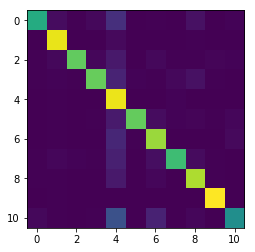

alpha= =5
training time:  0:01:12.245944
testing time:  0:00:18.443132
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.91      0.75      0.82      1184
   giai-tri       0.90      0.96      0.93      1373
   giao-duc       0.96      0.82      0.89      1266
   khoa-hoc       0.92      0.82      0.87      1320
 kinh-doanh       0.56      0.97      0.71      1350
 oto-xe-may       0.98      0.83      0.90      1261
  phap-luat       0.81      0.86      0.83      1350
     so-hoa       0.93      0.78      0.85      1208
   the-gioi       0.85      0.90      0.87      1344
   the-thao       0.96      0.99      0.98      1373
    thoi-su       0.85      0.61      0.71      1222

avg / total       0.87      0.85      0.85     14251
"
f1 score
0.850496513526
accuracy score
0.848782541576
confusion matrix:
[[ 884   37    6   32  137    0    6    3   61    3   15]
 [   1 1322    4    1   27    0    4    2    9    2    1]
 [  12   29 1044   27  

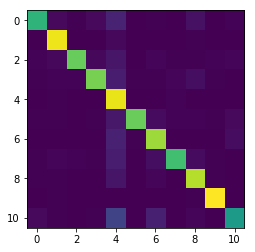

alpha= =1
training time:  0:01:15.187538
testing time:  0:00:20.412283
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.89      0.80      0.84      1184
   giai-tri       0.92      0.97      0.94      1373
   giao-duc       0.95      0.85      0.90      1266
   khoa-hoc       0.91      0.87      0.89      1320
 kinh-doanh       0.66      0.95      0.78      1350
 oto-xe-may       0.98      0.86      0.92      1261
  phap-luat       0.84      0.89      0.86      1350
     so-hoa       0.95      0.81      0.87      1208
   the-gioi       0.87      0.91      0.89      1344
   the-thao       0.98      0.99      0.98      1373
    thoi-su       0.83      0.72      0.77      1222

avg / total       0.89      0.88      0.88     14251
"
f1 score
0.87708254463
accuracy score
0.876991088345
confusion matrix:
[[ 948   30    7   44   75    1    7    2   47    0   23]
 [   2 1329    4    2   20    0    3    2    9    1    1]
 [  12   23 1082   29   

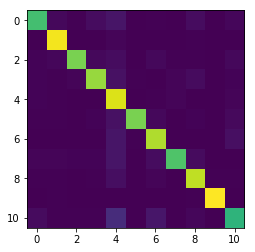

alpha= =0.5
training time:  0:01:16.683426
testing time:  0:00:19.453690
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.82      0.85      1184
   giai-tri       0.93      0.97      0.95      1373
   giao-duc       0.93      0.86      0.90      1266
   khoa-hoc       0.90      0.88      0.89      1320
 kinh-doanh       0.70      0.94      0.80      1350
 oto-xe-may       0.98      0.87      0.93      1261
  phap-luat       0.86      0.89      0.87      1350
     so-hoa       0.95      0.82      0.88      1208
   the-gioi       0.88      0.92      0.90      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.81      0.75      0.78      1222

avg / total       0.89      0.88      0.89     14251
"
f1 score
0.884449922492
accuracy score
0.884920356466
confusion matrix:
[[ 967   26    8   48   60    1    7    2   40    0   25]
 [   5 1331    6    2   16    0    3    2    7    0    1]
 [  11   21 1095   30

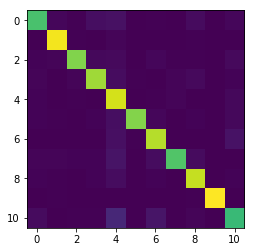

In [13]:
#'name', 'metrics'

#bnb = BernoulliNB()
#bnb_me = testClassifier(train_tfmat, train_lbl, test_tfmat, test_lbl, bnb)
#metrics_dict.append({'name':'BernoulliNB', 'metrics':bnb_me})
#
#
#gnb = GaussianNB()
#gnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, gnb)
#metrics_dict.append({'name':'GaussianNB', 'metrics':gnb_me})
alpha=[10,5,1,0.5]

for a in alpha:
    print "alpha= =" + str(a)
    mnb = MultinomialNB(a)
    mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
    metrics_dict.update({a:mnb_me})

#mnb = MultinomialNB(alpha=0.01)
#mnb_me = testClassifier(train_mat.toarray(), train_lbl, test_mat.toarray(), test_lbl, mnb)
#mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
#metrics_dict.append({'name':'MultinomialNB', 'metrics':mnb_me})


(0.5, 1, 5, 10)
(0.88492035646621292, 0.87699108834467754, 0.84878254157602973, 0.83439758613430637)


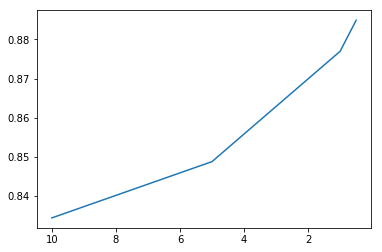

In [24]:
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.gca().invert_xaxis()
plt.show()